In [1]:
#basic library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting the dataset
train_data= pd.read_csv(r'C:\Users\DELL\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv')
test_data= pd.read_csv(r'C:\Users\DELL\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv')

In [3]:
# seeing dataset.
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# checking test dataset.
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
print("Dimension for Train dataset : ", train_data.shape)
print("Dimension for Test dataset : ", test_data.shape)

Dimension for Train dataset :  (159571, 8)
Dimension for Test dataset :  (153164, 2)


We can observe that in our train dataset we got 159571 rows and 8 columns, while our test dataset consist of only two columns are 153164 rows.

Let's see what each rows tell us about the dataset:

1. id 	: A unique id aligned with each comment text. 
2. comment_text: 	It includes the comment text. 
3. malignant: It is a column with binary values depicting which comments are malignant in nature. 
4. highly_malignant:	Binary column with labels for highly malignant text. 
5. rude: 	Binary column with labels for comments that are rude in nature. 
6. threat:	Binary column with labels for threatening context in the comments. 
7. abuse:  Binary column with labels with abusive behaviour.
8. loathe: 	Label to comments that are full of loathe and hatred.

train.csv:	the training set which contains comments with their binary labels. 
test.csv: 	The test set for which the predictions are to be done. It includes id and comments_text. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   



In [9]:
print("\nSummary for train dataset: \n")
train_data.info()
print("\n\nSummary of Test dataset : \n")
test_data.info()



Summary for train dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Summary of Test dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usa

From above observation we can say that we don't have any null values in either of the dataset. We can also observe that id and comment_text are object type while other columns are numerical type data.

We need to preprocess these object type of columns, to get some useful information out of it.

In [12]:
# Statistical description of dataset.
print("\n\n")
print(train_data.describe(include=[object]))

print("\n\n\n")
train_data.describe()




                      id                                       comment_text
count             159571                                             159571
unique            159571                                             159571
top     0000997932d777bf  Explanation\nWhy the edits made under my usern...
freq                   1                                                  1






,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from here we can observe that Both id and comment_text has total identical value throughout. From comment_text we need to do some NLP to get some meaningful information out of it.

Id seems to be the column which has unique value identifying particular user. we can eliminate this column, in order to make dataset suitable for model building.

In [13]:
# statistical description for test dataset
test_data.describe(include=[object])             # as both are object type columns

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


From above observation here also we can see that both id and comment text has unique value throughout. Id represents the unique number for every comment.

Let's proceed with calculating the length of comment_text.

In [15]:
# Finding the lenght of comment_text and making a new column comment_lenght
train_data['comment_length'] = train_data['comment_text'].str.len()
train_data.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [26]:
# similar steps for test dataset, finding lenght of comment_text in test dataset as well
test_data['comment_length'] = test_data['comment_text'].str.len()
test_data.head(2)

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50


comment_lenght give us an idea about how long our comment_text is! Which in return helps us to identify long text and small text. Now let's do some visualization before we proceed with preprocessing of text data using NLP.

# Visualization (EDA)


malignant


0    144277
1     15294
Name: malignant, dtype: int64


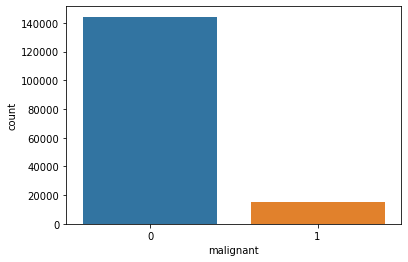

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


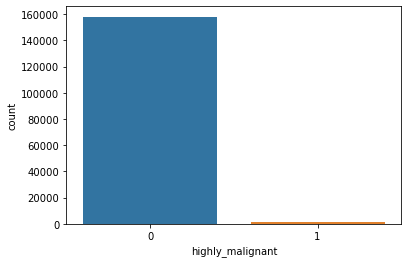

rude


0    151122
1      8449
Name: rude, dtype: int64


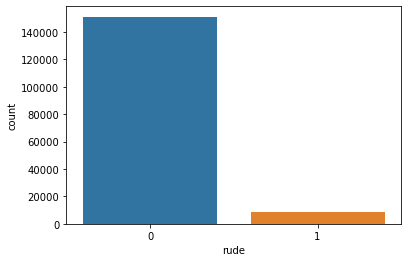

threat


0    159093
1       478
Name: threat, dtype: int64


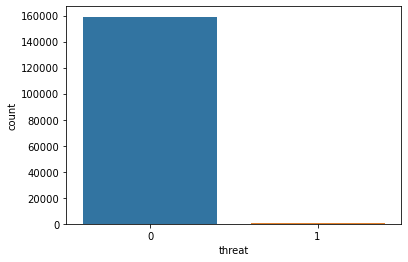

abuse


0    151694
1      7877
Name: abuse, dtype: int64


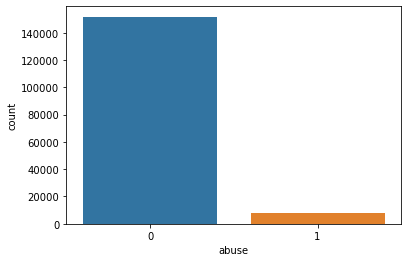

loathe


0    158166
1      1405
Name: loathe, dtype: int64


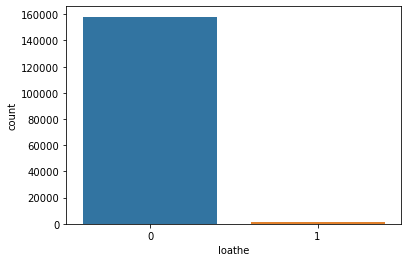

In [18]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print("\n")
    print(train_data[i].value_counts())
    sns.countplot(train_data[i])
    plt.show()

from above observation we can see clear imbalance in the distribution of 0 & 1 in the columns. Mostly the value for 0 is higher than that of 1. Even in our label column(malignant) the imbalance between the classes of label is pretty high.

In [142]:
#As we visualize above the Bad comment is much lower than the Good comments lets see that mathematicaly.
Bad_comment = train_data[(train_data['malignant']!=0) + (train_data['highly_malignant']!=0) + (train_data['rude']!=0) + 
                            (train_data['threat']!=0) + (train_data['abuse']!=0) + (train_data['loathe']!=0)]
percent=len(Bad_comment)/len(train_data)*100
print('Percentage of Bad/Negative comments = ',percent)
print('Percentage of Positive/Neutral comments = ', (100-percent))

Percentage of Bad/Negative comments =  10.167887648758233
Percentage of Positive/Neutral comments =  89.83211235124176


We can see that there are total of around 10.16% of negative comments, while rest are kind of positive or neutral.


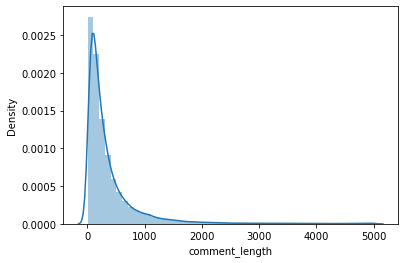

In [148]:
#let's see how comment_lenght is distributed.

sns.distplot(train_data['comment_length'])

plt.show()

We can see that, most of the comment are with in 650 word limit, there were few very large comment having upto 5000 words.

<AxesSubplot:xlabel='malignant', ylabel='comment_length'>

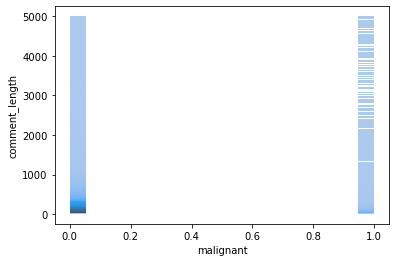

In [33]:
# Multivariate Analysis
sns.histplot(x='malignant', y='comment_length', data= train_data)

We can observe that malignant not necessary depends in lenght of comment_text., let's check for other columns as well.

<AxesSubplot:xlabel='highly_malignant', ylabel='comment_length'>

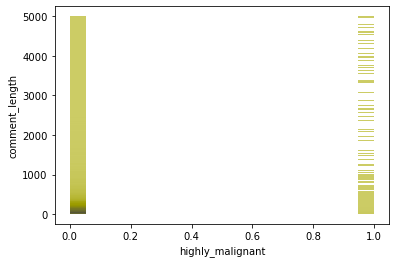

In [36]:
sns.histplot(x='highly_malignant', y='comment_length', data= train_data, color='yellow' )

we can how highly malignant data is distributed on comments lenght. It is not necessary that large comment is highly malignant. Lenght of comment does not defines the higly malignant characteristics of comment_text. 

<AxesSubplot:xlabel='rude', ylabel='comment_length'>

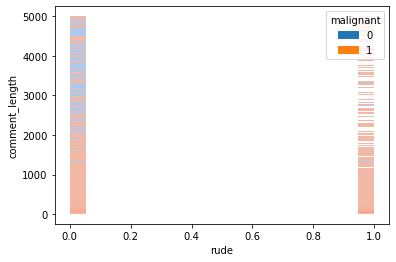

In [42]:
sns.histplot(x='rude', y='comment_length',hue='malignant', data=train_data)

We can observe that some of the rude comments can be malignant as well.

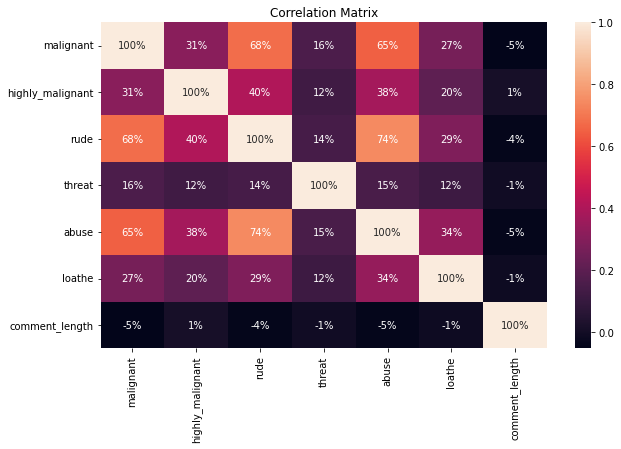

In [123]:
#correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

From above observation we can establish the fact that comment_lenght is not much of significant importance. Also some of the comments has multiple labels. Our focus point here is Malignant and we observe that rude and abuse shows strong correlation with it.

In common mans term we can say that mostly rude and abusive comments are malignant in nature.

One more thing is seen from here is that threat comments are clearly distinctive. One cannot miss these with other comment easily.

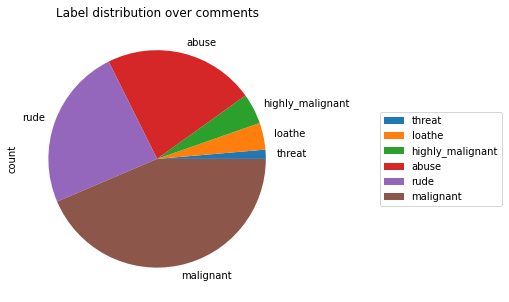

In [126]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train_data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

From above observation we can see that most of our comments has malignant as label, and least number of threat comment is present in the dataset. Rude and abuse comments are also good in numbers.

<AxesSubplot:xlabel='loathe', ylabel='comment_length'>

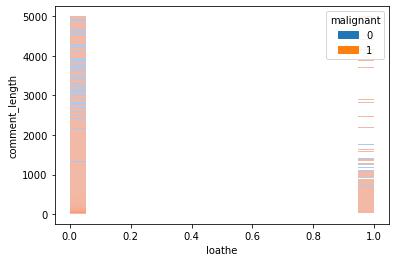

In [44]:
sns.histplot(x='loathe',y='comment_length', hue='malignant', data= train_data)

From above observation we can say that some of the loathe and malignant comment text are same.


Let's go ahead and did some pre processing for thge comment_text column. For that purpose we need to use NLP. Let's get started.

# Pre processing

In [45]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

# Data cleaning.

# 1. checking for duplicates and clean it 

In [46]:
train_data.duplicated().sum()

0

Since we don't have any duplicates, we are good to proceed. Also we don't have missing values. As we already check that.

# 2. pre processing 

In [48]:
import re

In [49]:
#expanding english language contractions:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", "s", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
    

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
stop_words=stopwords.words('english')
lemmatizer= WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [60]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [61]:
preprocessed_comment=[]
from tqdm import tqdm
#tqdm is for printing the status bar
for sentance in tqdm(train_data['comment_text'].values):
    sent= decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent)    #remove hyperlinks
    sent = re.sub('[^A-Za-z]+', ' ', sent)      #remove special characters, numbers
    sent = ' '.join(e for e in sent.split() if e not in stop_words)  # removing stop words
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())   # lemmatization
    preprocessed_comment.append(sent.lower().strip())

100%|██████████| 159571/159571 [00:36<00:00, 4426.38it/s]


In [62]:
train_data['comment_text']= preprocessed_comment

In [107]:
# let's perform same operation on test_data
preprocessed_comment_test=[]
from tqdm import tqdm
#tqdm is for printing the status bar
for sentance in tqdm(test_data['comment_text'].values):
    sent= decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent)    #remove hyperlinks
    sent = re.sub('[^A-Za-z]+', ' ', sent)      #remove special characters, numbers
    sent = ' '.join(e for e in sent.split() if e not in stop_words)  # removing stop words
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())   # lemmatization
    preprocessed_comment_test.append(sent.lower().strip())


100%|██████████| 153164/153164 [01:28<00:00, 1731.04it/s]


In [108]:
test_data['comment_text']= preprocessed_comment_test

In [112]:
# dropping id column in test_data
df_test= test_data.drop('id', axis=1)

In [64]:
# dropping id column
df_train= train_data.drop('id', axis=1)

df_train.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,explanation why edits made username hardcore m...,0,0,0,0,0,0,264
1,d aww he match background colour i seemingly s...,0,0,0,0,0,0,112


In [66]:
# adding a column name comment_length which determine the length of comment_text
df_train['comment_length'] = train_data['comment_text'].str.len()
df_train.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,explanation why edits made username hardcore m...,0,0,0,0,0,0,174
1,d aww he match background colour i seemingly s...,0,0,0,0,0,0,74


This Comment lenght will be new comment lenght of the dataset. From above two codes we can clearly observe preprocessing definately impact the comment_lenght(mainly decrease by great number).

Now let's use wordcloud in order to find out what are the red flag words in the text which makes a comment as Malignant, or highly malignant or threat or rude or loathe.

In [150]:
# installing wordcloud module to get the visualization of selected text. 
!pip install wordcloud

In [151]:
# importing wordcloud module
from wordcloud import WordCloud

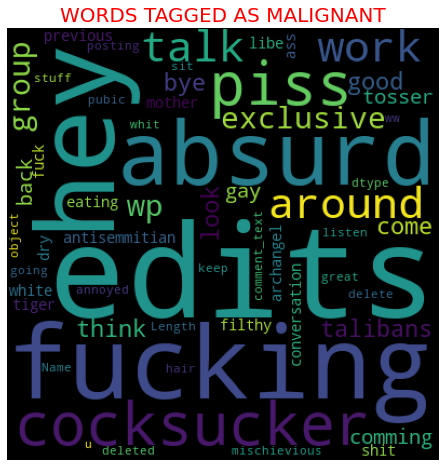

In [154]:
# making a dataframe which consist of malignant comment_text using which we will identify desired text.
df_malignant=df_train[(df_train['malignant']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

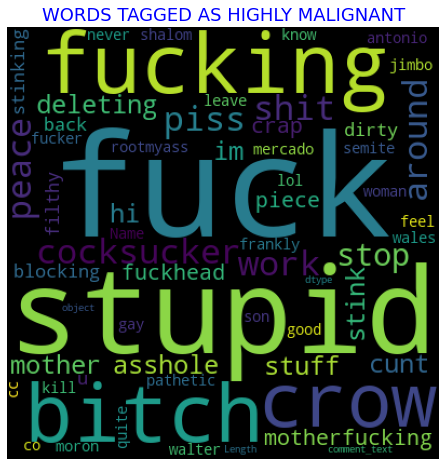

In [158]:
# creating dataframe of data having highly malignant comment_text.
df_highly_malignant=df_train[(df_train['highly_malignant']==1)]


#Plotting for highly malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highly_malignant['comment_text']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':18, 'fontweight':18, 'color':'blue'})
plt.show()

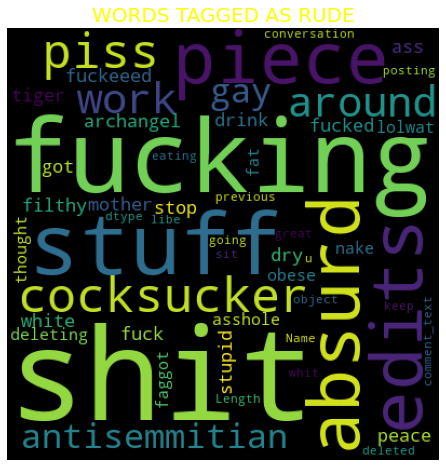

In [160]:
df_rude=df_train[(df_train['rude']==1)]


#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')                # to off the axis marking appeared in the plot
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()

From above plots we can see that what are the offensive words or red flag words which our MOdel see in comment_text to mark them malignant or highly malignant or rude. We can plot same plots for threat and loathe.

From above we also see certain word are very common to make a statement offensive in either sense. I think we can move ahead in our model, as we clearly get the visualization of words what makes a comment_text malignant or offensive.

# Splitting data into train , cv, and test 

In [67]:
#importing library

from sklearn.model_selection import train_test_split


In [68]:
# Separating Features and Label.
x= df_train.drop('malignant', axis=1)     #feature
output= df_train.malignant              #label

In [69]:
# Splitting data into three set 
train,test,train_output,test_output= train_test_split(x,output,test_size=0.3, random_state=0, stratify= output)


train_modified,cv,train_output_modified,cv_output = train_test_split(train, train_output,test_size=0.3,
                                                                     stratify= train_output,random_state=0)

In [70]:
# chceking the dimensions of input(features)
train.shape,cv.shape, test.shape

((111699, 7), (33510, 7), (47872, 7))

In [71]:
#checking dimensions of label.
train_output.shape, cv_output.shape, test_output.shape

((111699,), (33510,), (47872,))

Here we split dataset into three different set and will use the second split for cross validation. As this gives more accuracy  and also improves the efficiany.
here we use train data for training the dataset, test data for testing the dataset, and cv for cross validation purpose. We don't want any dataleakage, that's the reason we are doing in this way.



# Data Encoding

1. vectorization

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
#initiation of module
comment_tfidf_vectorizer = TfidfVectorizer(min_df= 5)


In [76]:
# Encoding train comment_text
train_comment_tfidf= comment_tfidf_vectorizer.fit_transform(train['comment_text'].values)

In [77]:
# Encoding CV and test comment_text
cv_comment_tfidf= comment_tfidf_vectorizer.transform(cv['comment_text'].values)
test_comment_tfidf= comment_tfidf_vectorizer.transform(test['comment_text'].values)

In [78]:
# saving the tfidf vectorizer
import pickle
with open("comment_tfidf_vectorizer.pickle","wb") as fp:
    pickle.dump(comment_tfidf_vectorizer,fp,protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
# comment_tfidf_vectorizer.get_feature_names()[:10]

In [118]:
# encoding for test data(comment_text)
data_test= comment_tfidf_vectorizer.transform(df_test['comment_text'].values)

In [119]:
data_test.shape            #chceking the dimesion of test dataset after encoding(vectorization)

(153164, 26378)

Out data now looks better, we can proceed with model building. Our label column is malignant, while the main feature is comment_text, around which our entire model is need to be build.


# Model Building

In [83]:
# importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Logistic Regression

In [86]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(train_comment_tfidf, train_output)

y_pred_train = LG.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = LG.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))

Training accuracy is 0.9618528366413307
Test accuracy is 0.9571565842245989
[[43020   264]
 [ 1787  2801]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43284
           1       0.91      0.61      0.73      4588

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.96      0.96      0.95     47872



In [87]:
from sklearn.metrics import log_loss
log_loss(test_output,y_pred_test)

1.479763567005419

In [90]:
# Cross validation
from sklearn.model_selection import cross_val_score

# validating accuracy

scr= cross_val_score(LG,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
LG_scr=scr.mean()
print("Cross Validation Score For Logistic Regression model : ", LG_scr)

Cross Validation Score For Logistic Regression model :  0.9473584321001176


This model works really well with out dataset, we are having good accuracy score, log_loss value and also precison which we check when performing cross validation.

# DecisionTreeClassifier

In [88]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(train_comment_tfidf, train_output)

y_pred_train = DT.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = DT.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))
print("Log Loss is : ", log_loss(test_output,y_pred_test))

Training accuracy is 0.9995881789452009
Test accuracy is 0.9382311163101604
[[41826  1458]
 [ 1499  3089]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43284
           1       0.68      0.67      0.68      4588

    accuracy                           0.94     47872
   macro avg       0.82      0.82      0.82     47872
weighted avg       0.94      0.94      0.94     47872

Log Loss is :  2.133446014639124


In [100]:
# cross validation:
scr= cross_val_score(DT,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
DT_scr=scr.mean()
print("Cross Validation Score For Decision Tree model : ", DT_scr)

Cross Validation Score For Decision Tree model :  0.6670467455782373


# Random Forest Classifier

In [92]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(train_comment_tfidf, train_output)

y_pred_train = RF.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = RF.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))
print("Log Loss is : ", log_loss(test_output,y_pred_test))

Training accuracy is 0.9995613210503227
Test accuracy is 0.9549632352941176
[[42936   348]
 [ 1808  2780]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43284
           1       0.89      0.61      0.72      4588

    accuracy                           0.95     47872
   macro avg       0.92      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872

Log Loss is :  1.5555205583082632


In [93]:
# cross validation:
scr= cross_val_score(RF,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
RF_scr=scr.mean()
print("Cross Validation Score For Random Forest model : ", RF_scr)

Cross Validation Score For Random Forest model :  0.9151605682144378


# XGBoost Classifier

In [94]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()

xgb.fit(train_comment_tfidf, train_output)

y_pred_train = xgb.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = xgb.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))
print("Log Loss is : ", log_loss(test_output,y_pred_test))

Training accuracy is 0.963911941915326
Test accuracy is 0.9541067847593583
[[42945   339]
 [ 1858  2730]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43284
           1       0.89      0.60      0.71      4588

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.95     47872

Log Loss is :  1.5851011614962325


In [95]:
# cross validation:
scr= cross_val_score(xgb,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
XGB_scr=scr.mean()
print("Cross Validation Score For XGBoost model : ", XGB_scr)

Cross Validation Score For XGBoost model :  0.9029255751641004


# AdaBoostClassifier

In [96]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)

ada.fit(train_comment_tfidf, train_output)

y_pred_train = ada.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = ada.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))
print("Log Loss is : ", log_loss(test_output,y_pred_test))

Training accuracy is 0.951646836587615
Test accuracy is 0.9508272058823529
[[42837   447]
 [ 1907  2681]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43284
           1       0.86      0.58      0.69      4588

    accuracy                           0.95     47872
   macro avg       0.91      0.79      0.83     47872
weighted avg       0.95      0.95      0.95     47872

Log Loss is :  1.698375606903223


In [97]:
# cross validation:
scr= cross_val_score(ada,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
ADA_scr=scr.mean()
print("Cross Validation Score For XGBoost model : ", ADA_scr)

Cross Validation Score For XGBoost model :  0.8457215193669064


# KNeighborsClassifier

In [98]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

knn.fit(train_comment_tfidf, train_output)

y_pred_train = knn.predict(train_comment_tfidf)
print('Training accuracy is {}'.format(accuracy_score(train_output, y_pred_train)))
y_pred_test = knn.predict(test_comment_tfidf)
print('Test accuracy is {}'.format(accuracy_score(test_output,y_pred_test)))
print(confusion_matrix(test_output,y_pred_test))
print(classification_report(test_output,y_pred_test))
print("Log Loss is : ", log_loss(test_output,y_pred_test))

Training accuracy is 0.9186384837823078
Test accuracy is 0.9161514037433155
[[43219    65]
 [ 3949   639]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43284
           1       0.91      0.14      0.24      4588

    accuracy                           0.92     47872
   macro avg       0.91      0.57      0.60     47872
weighted avg       0.92      0.92      0.89     47872

Log Loss is :  2.896029002820113


In [99]:
# cross validation:
scr= cross_val_score(knn,cv_comment_tfidf,cv_output,scoring='precision' ,cv=10)
KNN_scr=scr.mean()
print("Cross Validation Score For KNeighborsClassifier model : ", KNN_scr)

Cross Validation Score For KNeighborsClassifier model :  0.6362513268663375


# Summary or Conclusion
From above all Algorithms we can clearly see that Logistic Regression out performs. It has lowest log_loss value, highest precision value(Cross validation score), and also highest accuracy score. 

Even the test and train scores are almost in line, which means our Model is niether over fit nor underfit. 

Even when we take a look at Classification reports of all the Models, Logistic Regression outperform them as well, the f1_score, recall are also on the higher side.

Let's go ahead and save this model.




# Saving Best model

In [101]:
# saving best performing model and saving the model to disk
import pickle
filename= "Malignant_Comment_classification_project.sav"
pickle.dump(LG, open(filename, 'wb'))

We save the LogisticRegression Model as we find them as our best fit out of RandomForest, XGBoostClassifier, AdaBoostClassifier, DecisionTree and KNN. Here we take two deciding factor, First one is log_loss and second one is Precision(Cross validation scoring) into consideration. Accuracy_score is our secondary metrics.

Classification Report helps us in justifying our final decision.

For Predicting the test dataset, we need to open the model in rb mode and then we can predict the results.

# Predicting test dataset using above model



In [120]:
# Predicting the values for data_test
#load the model from disk.
loaded_model= pickle.load(open(filename,'rb'))

malignant_label= loaded_model.predict(data_test)

In [121]:
malignant_label

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# Saving the result in csv form

In [136]:
# let's save the results in csv form
# Checking for type of data
type(malignant_label)

numpy.ndarray

In [137]:
# making dataframe of the predicted result
df_label=pd.DataFrame(malignant_label, columns=['Malignant_Label'])

# checking the dimension of made dataframe.
df_label.shape

(153164, 1)

In [138]:
# Saving it in csv form
df_label.to_csv(r'C:\Users\DELL\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test_label.csv',index=False, header=True)

Now our predicted label is save in test_label.csv file.